In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("merged_data.csv")
df

,Unnamed: 0,kWh,MWh,solar_fore_de [MW],solar_fore_it [MW],wind_fore_de [MW],wind_fore_it [MW],temperature_fore_ch,temperature_fore_fr,temperature_fore_de,temperature_fore_it,CH_AT,CH_DE,CH_FR,CH_IT,AT_CH,DE_CH,FR_CH,IT_CH
0,2019-01-01 00:00:00,139525.003695,139.525004,0.0,0.0,21344.8514,4302.6977,4.1067,5.972900,7.426800,4.028100,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
1,2019-01-01 01:00:00,129716.036003,129.716036,0.0,0.0,23052.3310,4596.5916,4.1067,5.972900,7.426800,4.028100,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
2,2019-01-01 02:00:00,133398.074458,133.398074,0.0,0.0,24969.9701,4478.5564,3.7155,5.900717,7.246083,3.811433,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
3,2019-01-01 03:00:00,135133.851731,135.133852,0.0,0.0,27082.9626,4323.3712,3.3243,5.828533,7.065367,3.594767,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
4,2019-01-01 04:00:00,131699.424059,131.699424,0.0,0.0,26890.9717,4231.8283,2.9331,5.756350,6.884650,3.378100,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2021-12-31 19:00:00,171707.317615,171.707318,0.0,0.0,36997.7200,1108.4000,8.5300,9.960000,10.790000,9.590000,1200.0,4000.0,1400.0,4069.0,1200.0,800.0,3200.0,1810.0
26300,2021-12-31 20:00:00,159462.903412,159.462903,0.0,0.0,35666.9300,1077.9700,8.0000,9.400000,10.630000,9.110000,1200.0,4000.0,1400.0,4069.0,1200.0,800.0,3200.0,1810.0
26301,2021-12-31 21:00:00,155109.519730,155.109520,0.0,0.0,34383.8800,1048.2800,7.5000,8.880000,10.510000,8.670000,1200.0,4000.0,1400.0,3953.0,1200.0,800.0,3200.0,1810.0
26302,2021-12-31 22:00:00,171370.276941,171.370277,0.0,0.0,33075.2500,1078.7800,6.9700,8.510000,10.320000,8.140000,1200.0,4000.0,1400.0,3780.0,1200.0,800.0,3200.0,1810.0


In [4]:
df_new_index = df.set_index("Unnamed: 0")
df_new_index

,kWh,MWh,solar_fore_de [MW],solar_fore_it [MW],wind_fore_de [MW],wind_fore_it [MW],temperature_fore_ch,temperature_fore_fr,temperature_fore_de,temperature_fore_it,CH_AT,CH_DE,CH_FR,CH_IT,AT_CH,DE_CH,FR_CH,IT_CH
Unnamed: 0,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,139525.003695,139.525004,0.0,0.0,21344.8514,4302.6977,4.1067,5.972900,7.426800,4.028100,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
2019-01-01 01:00:00,129716.036003,129.716036,0.0,0.0,23052.3310,4596.5916,4.1067,5.972900,7.426800,4.028100,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
2019-01-01 02:00:00,133398.074458,133.398074,0.0,0.0,24969.9701,4478.5564,3.7155,5.900717,7.246083,3.811433,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
2019-01-01 03:00:00,135133.851731,135.133852,0.0,0.0,27082.9626,4323.3712,3.3243,5.828533,7.065367,3.594767,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
2019-01-01 04:00:00,131699.424059,131.699424,0.0,0.0,26890.9717,4231.8283,2.9331,5.756350,6.884650,3.378100,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,171707.317615,171.707318,0.0,0.0,36997.7200,1108.4000,8.5300,9.960000,10.790000,9.590000,1200.0,4000.0,1400.0,4069.0,1200.0,800.0,3200.0,1810.0
2021-12-31 20:00:00,159462.903412,159.462903,0.0,0.0,35666.9300,1077.9700,8.0000,9.400000,10.630000,9.110000,1200.0,4000.0,1400.0,4069.0,1200.0,800.0,3200.0,1810.0
2021-12-31 21:00:00,155109.519730,155.109520,0.0,0.0,34383.8800,1048.2800,7.5000,8.880000,10.510000,8.670000,1200.0,4000.0,1400.0,3953.0,1200.0,800.0,3200.0,1810.0


In [5]:
df_copy = df_new_index.copy()

In [6]:
df_copy.drop(columns=["kWh", "temperature_fore_fr", "temperature_fore_de", "temperature_fore_it", "IT_CH"], inplace=True)

X = df_copy.drop(columns=['MWh'])
y = df_copy['MWh']

In [7]:
X

,solar_fore_de [MW],solar_fore_it [MW],wind_fore_de [MW],wind_fore_it [MW],temperature_fore_ch,CH_AT,CH_DE,CH_FR,CH_IT,AT_CH,DE_CH,FR_CH
Unnamed: 0,,,,,,,,,,,,
2019-01-01 00:00:00,0.0,0.0,21344.8514,4302.6977,4.1067,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0
2019-01-01 01:00:00,0.0,0.0,23052.3310,4596.5916,4.1067,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0
2019-01-01 02:00:00,0.0,0.0,24969.9701,4478.5564,3.7155,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0
2019-01-01 03:00:00,0.0,0.0,27082.9626,4323.3712,3.3243,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0
2019-01-01 04:00:00,0.0,0.0,26890.9717,4231.8283,2.9331,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,0.0,0.0,36997.7200,1108.4000,8.5300,1200.0,4000.0,1400.0,4069.0,1200.0,800.0,3200.0
2021-12-31 20:00:00,0.0,0.0,35666.9300,1077.9700,8.0000,1200.0,4000.0,1400.0,4069.0,1200.0,800.0,3200.0
2021-12-31 21:00:00,0.0,0.0,34383.8800,1048.2800,7.5000,1200.0,4000.0,1400.0,3953.0,1200.0,800.0,3200.0


In [8]:
y

Unnamed: 0
2019-01-01 00:00:00    139.525004
2019-01-01 01:00:00    129.716036
2019-01-01 02:00:00    133.398074
2019-01-01 03:00:00    135.133852
2019-01-01 04:00:00    131.699424
                          ...    
2021-12-31 19:00:00    171.707318
2021-12-31 20:00:00    159.462903
2021-12-31 21:00:00    155.109520
2021-12-31 22:00:00    171.370277
2021-12-31 23:00:00    146.054791
Name: MWh, Length: 26304, dtype: float64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression

In [13]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [14]:
y_pred_lr = lr.predict(X_test_scaled)

In [15]:
y_pred_lr

array([ 76.14317366, 114.14054149,  62.10577518, ...,  73.24228958,
       111.6620699 ,  76.95286645])

In [16]:
lasso = Lasso(alpha=0.01) # Sie können den Alpha-Parameter anpassen, um die Stärke der Regularisierung zu steuern
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

In [17]:
# Qualität des linearen Regressionsmodells bewerten
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"[Linear Regression] Mean Squared Error: {mse_lr}")
print(f"[Linear Regression] Mean Absolute Error: {mae_lr}")
print(f"[Linear Regression] R^2 Score: {r2_lr}")

# Qualität des Lasso-Modells bewerten
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"\n[Lasso Regression] Mean Squared Error: {mse_lasso}")
print(f"[Lasso Regression] Mean Absolute Error: {mae_lasso}")
print(f"[Lasso Regression] R^2 Score: {r2_lasso}")

[Linear Regression] Mean Squared Error: 793.7302085569403
[Linear Regression] Mean Absolute Error: 21.72686019434929
[Linear Regression] R^2 Score: 0.3853220137578428

[Lasso Regression] Mean Squared Error: 793.581921301743
[Lasso Regression] Mean Absolute Error: 21.725241647063463
[Lasso Regression] R^2 Score: 0.38543684989539606


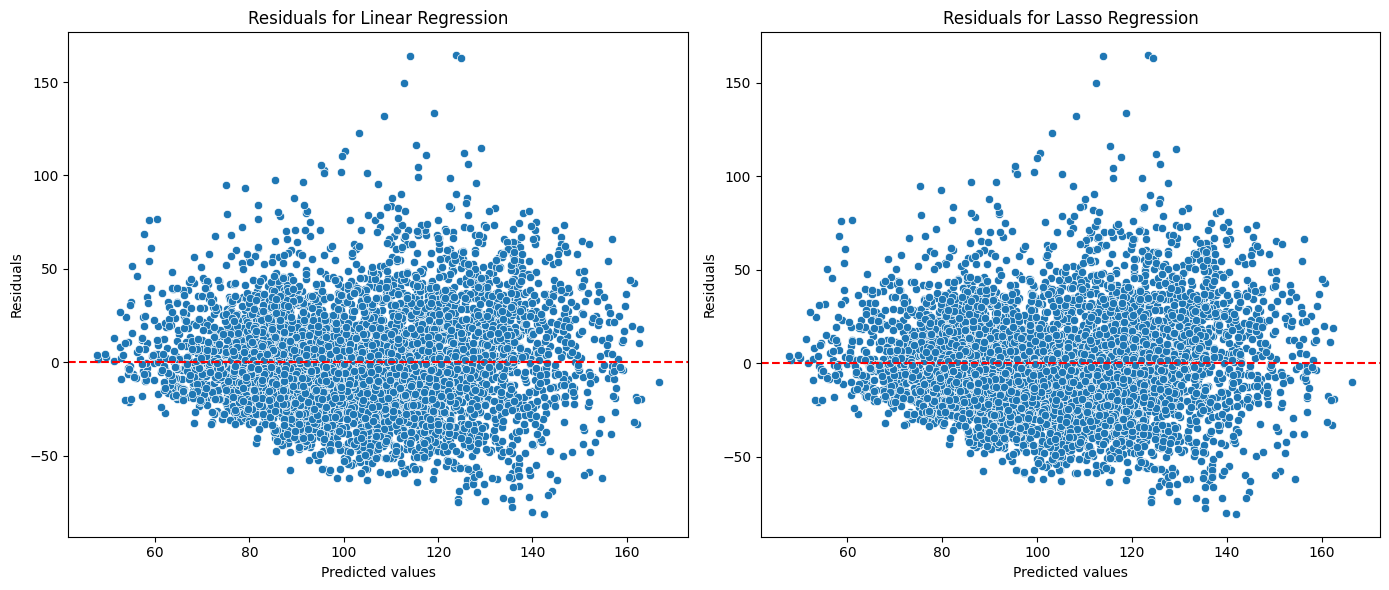

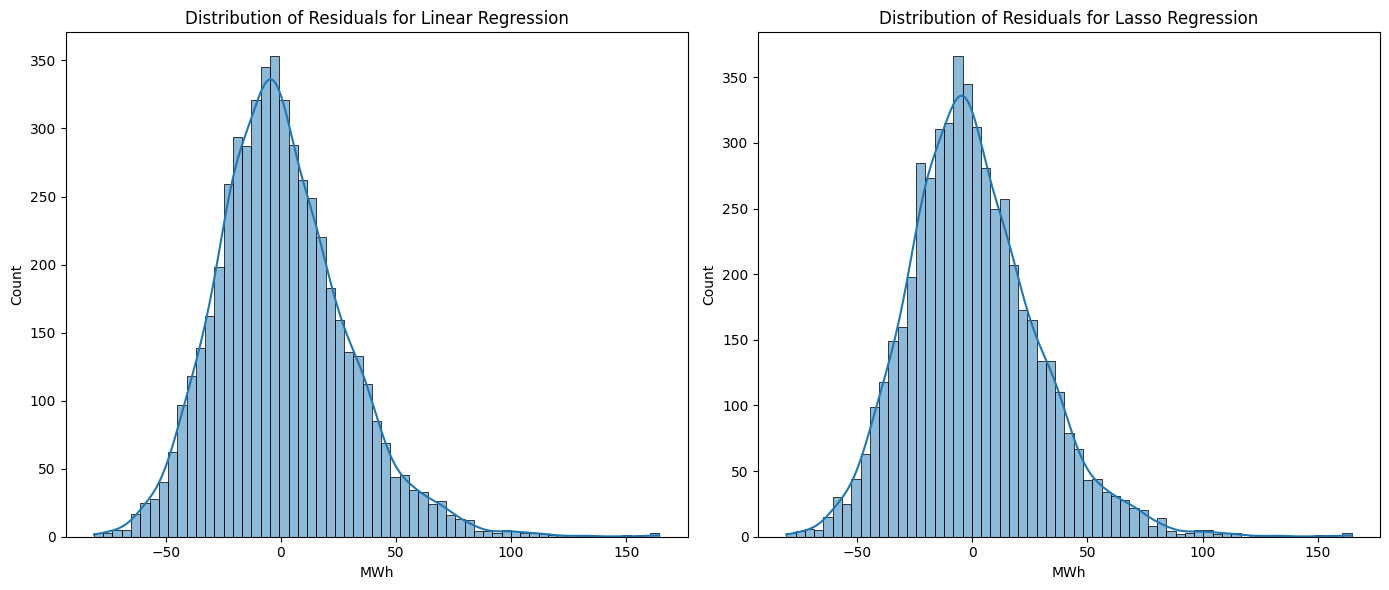

In [18]:
# Residuen für die lineare Regression berechnen
residuals_lr = y_test - y_pred_lr

# Residuen für die Lasso-Regression berechnen
residuals_lasso = y_test - y_pred_lasso

# Scatterplots der vorhergesagten Werte gegen die Residuen
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_lr, y=residuals_lr)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals for Linear Regression')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred_lasso, y=residuals_lasso)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals for Lasso Regression')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Optional: Histogramm der Residuen
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals_lr, kde=True)
plt.title('Distribution of Residuals for Linear Regression')

plt.subplot(1, 2, 2)
sns.histplot(residuals_lasso, kde=True)
plt.title('Distribution of Residuals for Lasso Regression')

plt.tight_layout()
plt.show()

## Decision Tree

In [19]:
# Erstellen und trainieren des Decision Tree Modells
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)

# Vorhersagen mit dem Decision Tree Modell
y_pred_dt = dt.predict(X_test_scaled)

# Evaluieren des Decision Tree Modells
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"[Decision Tree] Mean Squared Error: {mse_dt}")
print(f"[Decision Tree] Mean Absolute Error: {mae_dt}")
print(f"[Decision Tree] R^2 Score: {r2_dt}")

[Decision Tree] Mean Squared Error: 472.69121618438703
[Decision Tree] Mean Absolute Error: 14.678306624456004
[Decision Tree] R^2 Score: 0.6339399940354775


## Random Forest

In [20]:
# Erstellen und trainieren des Random Forest Modells
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Vorhersagen mit dem Random Forest Modell
y_pred_rf = rf.predict(X_test_scaled)

# Evaluieren des Random Forest Modells
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"[Random Forest] Mean Squared Error: {mse_rf}")
print(f"[Random Forest] Mean Absolute Error: {mae_rf}")
print(f"[Random Forest] R^2 Score: {r2_rf}")

[Random Forest] Mean Squared Error: 220.97559508663923
[Random Forest] Mean Absolute Error: 11.095782741385152
[Random Forest] R^2 Score: 0.8288727928807642


In [21]:
y_test_array = y_test.to_numpy().reshape(-1, 1)
y_pred_rf_array = y_pred_rf.reshape(-1, 1)

# Rückgängige Transformation
y_test_inv = scaler.inverse_transform(y_test_array)
y_pred_rf_inv = scaler.inverse_transform(y_pred_rf_array)

ValueError: non-broadcastable output operand with shape (5261,1) doesn't match the broadcast shape (5261,12)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_inv, y_pred_rf_inv, alpha=0.5)
plt.plot([min(y_test_inv), max(y_test_inv)], [min(y_test_inv), max(y_test_inv)], color='red')  # Diagonale Linie
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest - Test vs. Prediction (Original Scale)')
plt.grid(True)
plt.show()